<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/04.%20Week%204/Assignment/02_DeepLearning_Task__Week_4_RNN%2CLSTM%2C_GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow
#!pip install scikit-learn

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

##Tensorflow

###Data Preparation

In [3]:
num_words = 50000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

###RNN

Pemodelan RNN

In [5]:
def rnn_model(vocab_size, embed_size, hidden_size):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        SimpleRNN(hidden_size, dropout=0.5, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimzer

In [6]:
RNN_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [7]:
def train_model_RNN(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = RNN_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr]
    )

    return model, history
rnn_model = rnn_model(num_words, embed_size=128, hidden_size=256)
rnn_model, rnn_history = train_model_RNN(rnn_model, x_train, y_train, x_test, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.5139 - loss: 0.7253 - val_accuracy: 0.5033 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.4958 - loss: 0.6950 - val_accuracy: 0.4976 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.5054 - loss: 0.6946 - val_accuracy: 0.4977 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.5118 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6944 - learning_rate: 0.0010
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.4981 - loss: 0.6946 - val_accuracy: 0.4986 - val_loss: 0.6964 - learning_rate: 5.0000e-04


###LSTM

Modeling data LSTM

In [8]:
def lstm_model(vocab_size, embed_size, hidden_size):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        LSTM(hidden_size, dropout=0.5, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [9]:
LSTM_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [10]:
def train_model_LSTM(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = LSTM_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr]
    )

    return model, history
lstm_model = lstm_model(num_words, embed_size=128, hidden_size=256)
lstm_model, lstm_history = train_model_LSTM(lstm_model, x_train, y_train, x_test, y_test)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.6341 - loss: 0.6218 - val_accuracy: 0.8041 - val_loss: 0.4368 - learning_rate: 0.0010
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.8780 - loss: 0.3103 - val_accuracy: 0.8694 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9390 - loss: 0.1731 - val_accuracy: 0.8054 - val_loss: 0.4728 - learning_rate: 0.0010
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.9536 - loss: 0.1275 - val_accuracy: 0.8158 - val_loss: 0.4683 - learning_rate: 0.0010
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9761 - loss: 0.0753 - val_accuracy: 0.8666 - val_loss: 0.4336 - learning_rate: 5.0000e-04


###GRU

Modeling data GRU

In [11]:
def gru_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        Bidirectional(GRU(hidden_size, dropout=0.3, return_sequences=True)),
        Bidirectional(GRU(hidden_size//2, dropout=0., return_sequences=False)),
        Dense(64, kernel_regularizer='l2'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [12]:
GRU_optimizer = Adam(learning_rate=0.0001)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

Training Data

In [13]:
def train_model_GRU(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = GRU_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=64,
        callbacks=callbacks,
    )

    return model, history
gru_model = gru_model(num_words, embed_size=128, hidden_size=256)
gru_model, gru_history = train_model_GRU(gru_model, x_train, y_train, x_test, y_test)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 249ms/step - accuracy: 0.5385 - loss: 1.5969 - val_accuracy: 0.5000 - val_loss: 1.6826 - learning_rate: 1.0000e-04
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 248ms/step - accuracy: 0.7940 - loss: 0.9696 - val_accuracy: 0.8414 - val_loss: 0.6995 - learning_rate: 1.0000e-04
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 248ms/step - accuracy: 0.9011 - loss: 0.5446 - val_accuracy: 0.7881 - val_loss: 0.6630 - learning_rate: 1.0000e-04
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 248ms/step - accuracy: 0.9360 - loss: 0.3307 - val_accuracy: 0.8484 - val_loss: 0.4981 - learning_rate: 1.0000e-04
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 198ms/step - accuracy: 0.9575 - loss: 0.2006 - val_accuracy: 0.8331 - val_loss: 0.5281 - learning_rate: 1.0000e-04
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 247ms/step - accuracy: 0.9649 - loss: 0.1394 - val_accuracy: 0.7574 - val_loss: 0.8483 - learning_rate: 1.0000e-04
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 

###Evaluasi dari RNN, LSTM, dan GRU

Modeling evaluasi untuk RNN, LSTM, dan GRU

In [14]:
def evaluate_model(model, x_test, y_test, model_name):
    y_prob = model.predict(x_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Evaluation:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    plt.xticks([0,1], ['Negative', 'Positive'])
    plt.yticks([0,1], ['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')

    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

perbandingan antara RNN, LSTM, GRU

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step

RNN Evaluation:
Accuracy: 0.4986
Precision: 0.4993
Recall: 0.9742
F1 Score: 0.6602
ROC AUC: 0.5210

Classification Report:
              precision    recall  f1-score   support

    Negative       0.47      0.02      0.04     12500
    Positive       0.50      0.97      0.66     12500

    accuracy                           0.50     25000
   macro avg       0.49      0.50      0.35     25000
weighted avg       0.49      0.50      0.35     25000



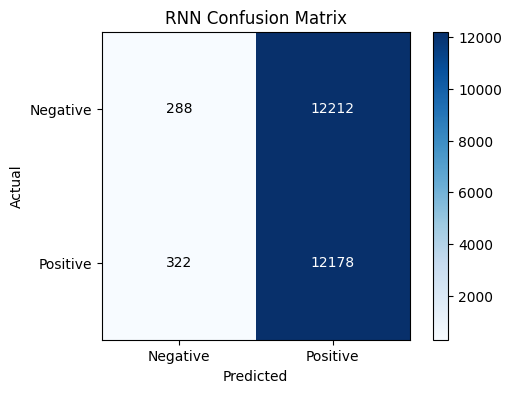

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step

LSTM Evaluation:
Accuracy: 0.8663
Precision: 0.8667
Recall: 0.8658
F1 Score: 0.8662
ROC AUC: 0.9362

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



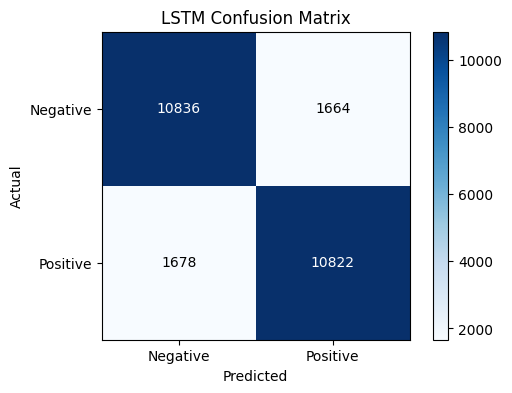

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step

GRU Evaluation:
Accuracy: 0.7893
Precision: 0.9261
Recall: 0.6287
F1 Score: 0.7490
ROC AUC: 0.9168

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.95      0.82     12500
    Positive       0.93      0.63      0.75     12500

    accuracy                           0.79     25000
   macro avg       0.82      0.79      0.78     25000
weighted avg       0.82      0.79      0.78     25000



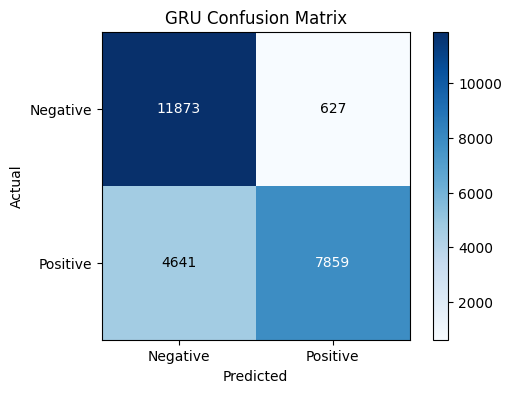

In [15]:
rnn_results = evaluate_model(rnn_model, x_test, y_test, 'RNN')
lstm_results = evaluate_model(lstm_model, x_test, y_test, 'LSTM')
gru_results = evaluate_model(gru_model, x_test, y_test, 'GRU')

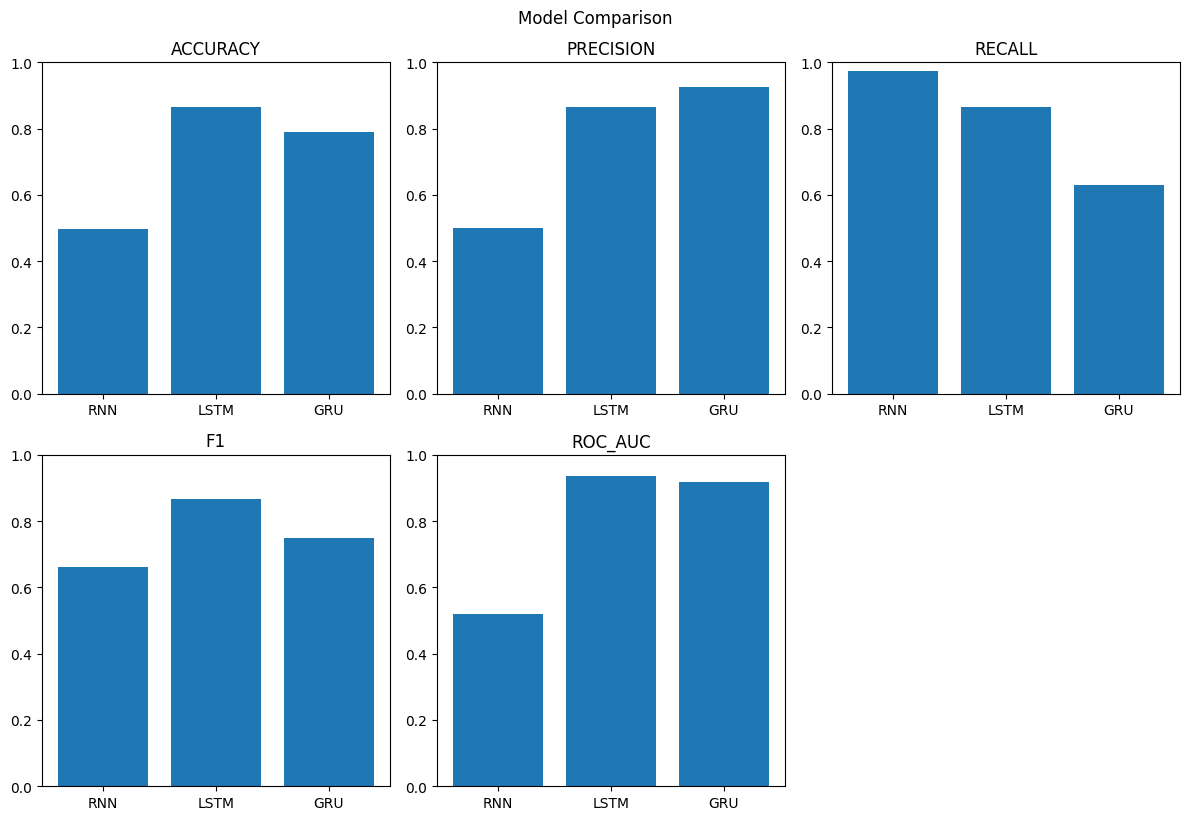

In [16]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {'RNN': rnn_results, 'LSTM': lstm_results, 'GRU': gru_results}

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(results.keys(), [results[model][metric] for model in results])
    plt.title(metric.upper())
    plt.ylim(0, 1)
plt.tight_layout()
plt.suptitle('Model Comparison', y=1.02)
plt.show()

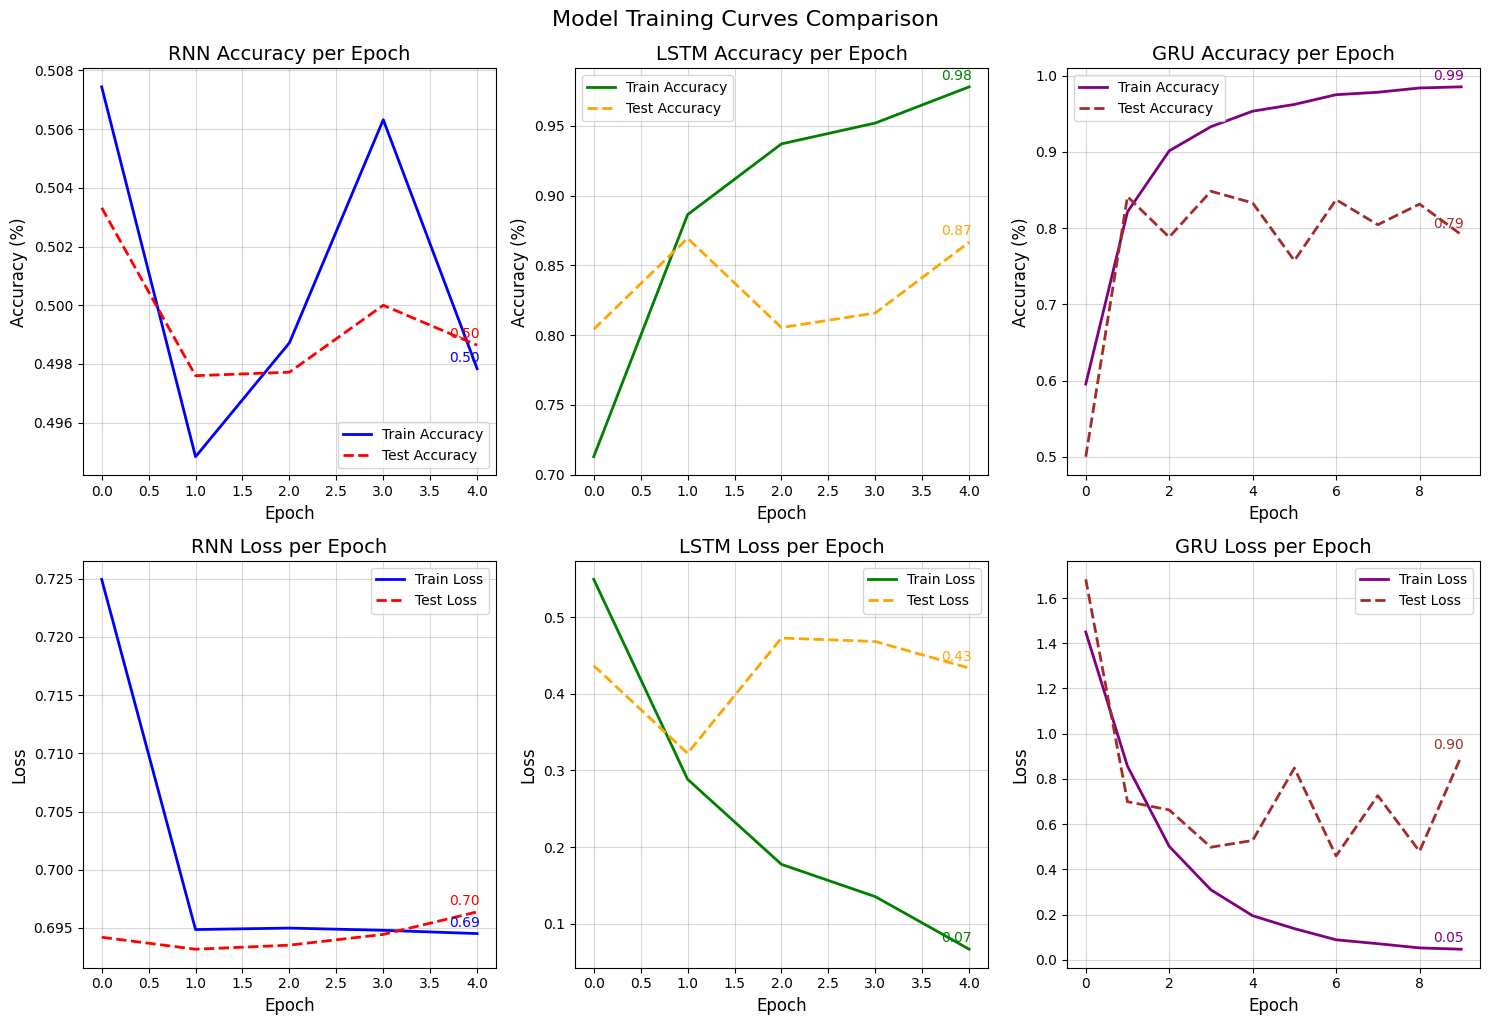

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# RNN Training Curves
plt.subplot(2, 3, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_accuracy'], '--', label='Test Accuracy', color='red', linewidth=2)
plt.title('RNN Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['accuracy']) - 1, rnn_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['val_accuracy']) - 1, rnn_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

plt.subplot(2, 3, 4)
plt.plot(rnn_history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_loss'], '--', label='Test Loss', color='red', linewidth=2)
plt.title('RNN Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['loss'][-1]:.2f}",
             xy=(len(rnn_history.history['loss']) - 1, rnn_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_loss'][-1]:.2f}",
             xy=(len(rnn_history.history['val_loss']) - 1, rnn_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

# LSTM Training Curves
plt.subplot(2, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(lstm_history.history['val_accuracy'], '--', label='Test Accuracy', color='orange', linewidth=2)
plt.title('LSTM Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['accuracy']) - 1, lstm_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['val_accuracy']) - 1, lstm_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

plt.subplot(2, 3, 5)
plt.plot(lstm_history.history['loss'], label='Train Loss', color='green', linewidth=2)
plt.plot(lstm_history.history['val_loss'], '--', label='Test Loss', color='orange', linewidth=2)
plt.title('LSTM Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['loss'][-1]:.2f}",
             xy=(len(lstm_history.history['loss']) - 1, lstm_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_loss'][-1]:.2f}",
             xy=(len(lstm_history.history['val_loss']) - 1, lstm_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

# GRU Training Curves
plt.subplot(2, 3, 3)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy', color='purple', linewidth=2)
plt.plot(gru_history.history['val_accuracy'], '--', label='Test Accuracy', color='brown', linewidth=2)
plt.title('GRU Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['accuracy']) - 1, gru_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['val_accuracy']) - 1, gru_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.subplot(2, 3, 6)
plt.plot(gru_history.history['loss'], label='Train Loss', color='purple', linewidth=2)
plt.plot(gru_history.history['val_loss'], '--', label='Test Loss', color='brown', linewidth=2)
plt.title('GRU Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['loss'][-1]:.2f}",
             xy=(len(gru_history.history['loss']) - 1, gru_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_loss'][-1]:.2f}",
             xy=(len(gru_history.history['val_loss']) - 1, gru_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.tight_layout()
plt.suptitle('Model Training Curves Comparison', fontsize=16, y=1.02)
plt.show()